In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('diabetes.csv')

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BMI'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['BMI'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['BMI'].mean())

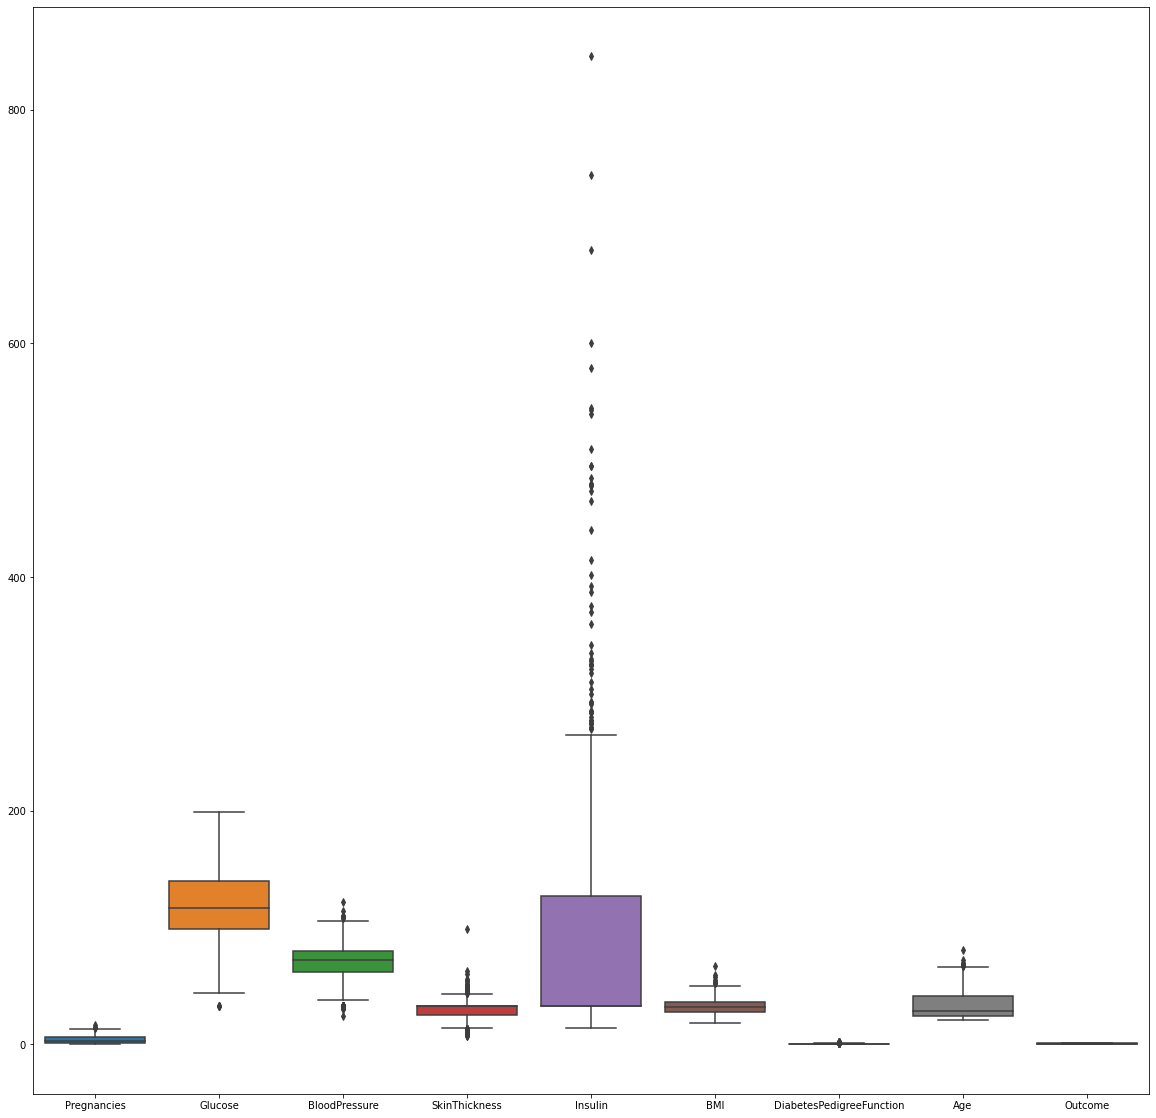

In [6]:
fig , ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

In [7]:
q= df['Insulin'].quantile(0.70)
df_new = df[df['Insulin'] < q]

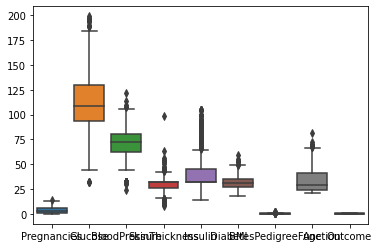

In [8]:
fig,ax = plt.subplots()
sns.boxplot(data = df_new, ax = ax)

In [10]:
df_0=df[df['Outcome']==0]
df_1=df[df['Outcome']==1]
yes=len(df[df.Outcome==1])
df_0_under=df_0.sample(yes)
df_under=pd.concat([df_0_under,df_1])
df_under.Outcome.value_counts()

0    268
1    268
Name: Outcome, dtype: int64

In [11]:
x = df_new.drop(columns=['Outcome'])  
y = df_new['Outcome'] 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.20,random_state=144) 

In [16]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(verbose=1,n_jobs=4,solver='liblinear')

In [17]:
model1.fit(x_train,y_train)

[LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))


LogisticRegression(n_jobs=4, solver='liblinear', verbose=1)

In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,32.450805,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,32.450805,26.6,0.351,31,0
2,8,183.0,64.0,32.450805,32.450805,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [19]:
z = model1.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,z)

0.2222222222222222

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
confusion_matrix(y_test,z)

array([[72,  8],
       [16, 12]])

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test,z).ravel()
accuracy=(tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
F1_score = 2*(recall * precision) / (recall + precision)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",F1_score)



Accuracy:  0.7777777777777778
Precision:  0.6
Recall:  0.42857142857142855
F1 Score:  0.5


In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,z, average=None)

0.6642857142857144